# Análsis de frecuencias

Programa creado 03 de frebrero de 2022. Guillermo Segura Gómez

Edit. 11 de febrero de 2022

In [2]:
# Se importan las librerias que se van a necesitar.
# numpy - Manejo de arreglos. matplotlib - Gráficas. padas - Matrices. statistics - Estadística

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st

# Leemos los datos y los guardamos en un data frame de pandas. 
# dat - Geometrias. shift - Shift
dat = pd.read_csv('/Users/guill/Desktop/Codes/Tesis/Procesamiento digital de imagenes/Caracterizacion dispositivo/DSC_7660_VP-FRR-0.25_FRD-03_FRC-12_006-Geometries.csv')
shift = pd.read_csv('/Users/guill/Desktop/Codes/Tesis/Procesamiento digital de imagenes/Caracterizacion dispositivo/DSC_7660_VP-FRR-0.25_FRD-03_FRC-12_006-Geometries-Shift.csv')

"""
d = dat.iloc[:,6]
f = dat.iloc[:,4]
l = dat.iloc[:,0]
w = dat.iloc[:,1]

a = dat.iloc[:,3]
"""

f = dat.iloc[:,0]
a = dat.iloc[:,4]
d = dat.iloc[:,6]

frame = shift.iloc[:,0]
s = shift.iloc[:,1]

**Se necesitan algunos valores y vectores donde se van a guardar algunos datos***

El valor **count** se inicializa, es un entero en el que se van a guardar la cantidad de gotas en cada 60 frames

**frecuency** - El vector en el que se guarda los valores de la frecuencia.

**time** - Un entero para ir guardando los valores de los segundos.

**tiempo** - Un vector que guarda en cada espacio un segundo, es decir los valores de time.

**gotas** - El vector que guarda la cantidad de gotas por frame

**g** - Un entero para ir guardando el valor de las gotas


El algoritmo funciona como sigue: Se checan los valores del centroide y se le da un seguimiento a las gotas. Los valores
del centoide estan en pixeles, entonces entre mas pequeños sean los valores mas a la izquierda estan. Ya que el flujo de
las gotas es de derecha a izquierda, en algun punto del lado izquierdo las gotas desaparecen. El algoritmo cuenta las gotas
una vez que éstas desaparecen. La manera que podemos saber que una gota desapareció es revisando el frame siguiente. 
Mientras que las gotas se mueven el valor del centroide va disminuyendo (se van moviendo hacia la izquierda), en algun punto
cuando la gota desaparece el valor del centroide es mayor al anterior. El programa va checando los valores del centroide 
por frame, entonces cuando el valor del siguiente frame es mayor cuenta una gota.


In [6]:
count = 0
frecuency = []
time = 0
tiempo = []

gotas = []
g = 0

"""
a_prom = st.mean(a)
cota_s = a_prom*1.5
cota_i = a_prom*0.5
"""
#Se establecen las cotas de los valores de acuerdo a una distribución normal
a_prom = st.mean(a)
cota_s = a_prom + st.pstdev(a)*4
cota_i = a_prom - st.pstdev(a)*4

for i in range(len(d)-1):
#for i in range(0,15,1):
    
    j = i
    
    # Checamos el siguiente frame, guardamos el primer lugar del siguiente frame en j
    while(f[i] == f[j] and cota_i < a[j] < cota_s):
        
        # Si estamos en el último frame rompemos el ciclo para que no nos de error
        if j == len(d)-1:
            break
        
        j = j + 1
        
        # Se guarda el número de gotas
        g = g + 1
        
    # Agregamos el valor del número de gotas solo si nos encontramos en la ultima casilla del frame
    if i != 0:
        
        if f[i] != f[i-1]:
            gotas.append(g)
    #else:
        
    #    gotas.append(g)
    
    # Reiniciamos el valor de las gotas
    g = 0
        
    # Comparamos los lugares del centroide con el del siguiente frame si es menor contamos una gota
    if d[i] < d[j] and cota_i < a[i] < cota_s and cota_i < a[j] < cota_s:
        count = count+1
        """
        print(f[i])
        print(i)
        """
        
    # Cuando llegamos al frame 60 añadimos el valor de count al vector de frecuencias
    # Se checa tambien que se este en el ultimo valor del frame
    if (f[i]) % 60 == 0 and f[i+1] != f[i]:
        frecuency.append(count)
        
        """
        if(count<8):
            print(i)
            print(f[i])
            print(count)
        """
        
        #Añadimos el valor del tiempo. Para graficar.
        tiempo.append(time)
        time = time +1
        
        #Reiniciamos el contador
        count=0

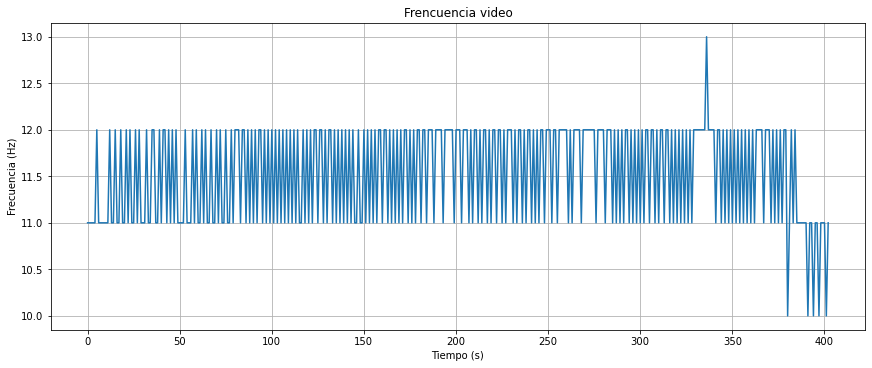

La frecuencia promedio es igual a: 11.528535980148883 Gotas/sec


In [7]:
#Graficamos la frecuencia       
fig, ax = plt.subplots(figsize=(12, 5), constrained_layout=True)

frecuency = np.asarray(frecuency)
tiempo = np.asarray(tiempo)

plt.plot(tiempo, frecuency)
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.title("Frencuencia video")

plt.grid()
plt.show()

#Se calcula la frecuencia promedio
suma = 0
for i in range(len(frecuency)):
    suma = frecuency[i] + suma
media = suma/len(frecuency)

print("La frecuencia promedio es igual a: " + str(media) + " Gotas/sec")

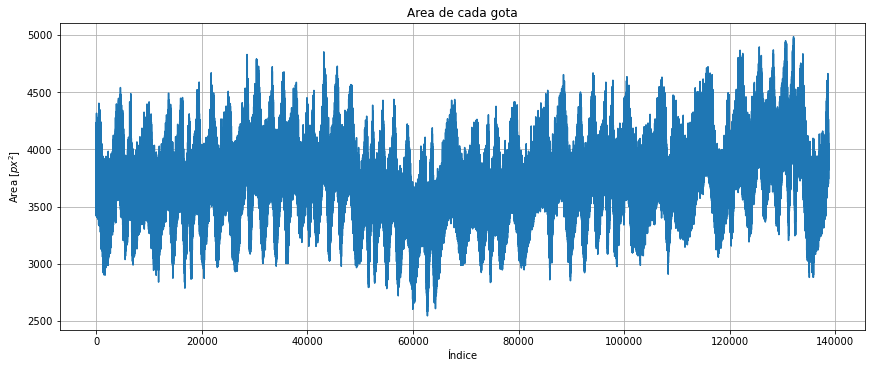

In [44]:
# Graficamos el área
fig, ax = plt.subplots(figsize=(12, 5), constrained_layout=True)

plt.plot(a)

plt.title("Area de cada gota")
plt.ylabel("Area $[px^2]$")
plt.xlabel("Índice")

plt.grid()
plt.show()

In [9]:
print("La cota inferior: " + str(cota_i))
print("La cota superior: " + str(cota_s))

La cota inferior: 2308.460279251106
La cota superior: 4857.771977790208


## Velocidad de las gotas

Calculamos la velocidad de la gotas como sigue:

Tenemos primero el número de gotas que hay en cada frame. Además tenemos el desplazamiento promedio de las gotas por frame. Entonces si dividimos el desplazamiento **(s)** entre el tiempo que esas gotas tardan en desplazarse obtenemos la velocidad promedio de una gota por frame. 

$$
\bar{v}_{\text{gota}} = \frac{s}{t}
$$

El tiempo **t** de un frame es igual a una sexágesima parte de un segundo, ya que *60 frames = 1s*. Entonces t = 1/60 s

In [29]:
t = 1/60

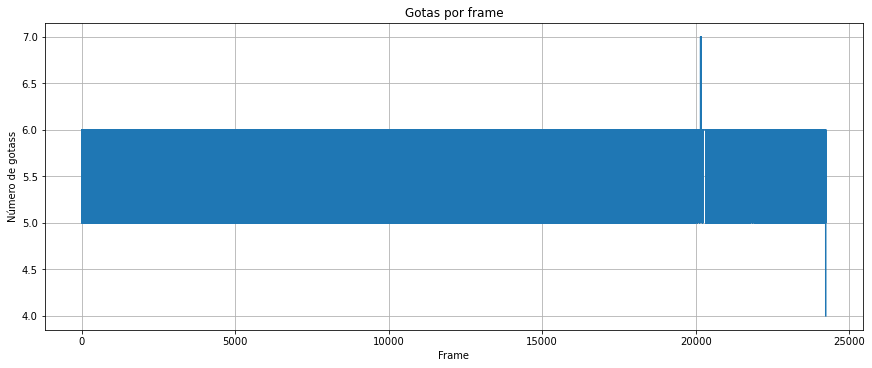

In [10]:
# La cantidad de gotas por frame
fig, ax = plt.subplots(figsize=(12, 5), constrained_layout=True)

plt.plot(gotas)

plt.title("Gotas por frame")
plt.ylabel("Número de gotass")
plt.xlabel("Frame")

plt.grid()
plt.show()

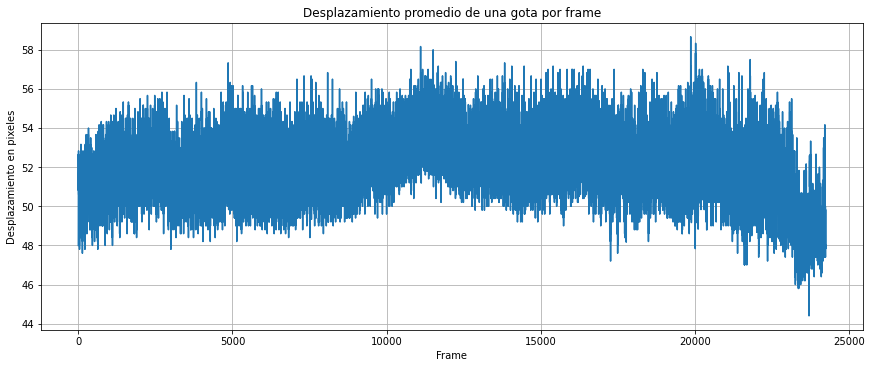

El desplazamiento promedio de una gota es igual a: 51.92515679154976 px


In [33]:
# Desplazamiento promedio de una gota por frame (shift)
fig, ax = plt.subplots(figsize=(12, 5), constrained_layout=True)

plt.plot(s)

plt.title("Desplazamiento promedio de una gota por frame")
plt.ylabel("Desplazamiento en pixeles")
plt.xlabel("Frame")

plt.grid()
plt.show()

print("El desplazamiento promedio de una gota es igual a: " + str(st.mean(s)) + " px")

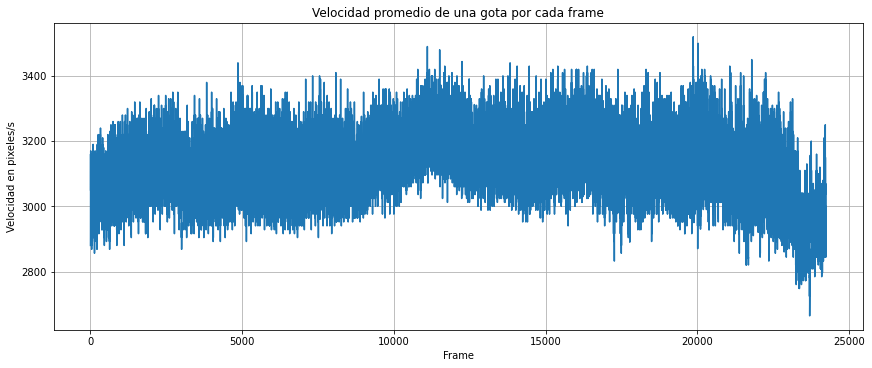

La velocidad promedio es igual a: 3115.5094074929857 pixeles/s


In [31]:
fig, ax = plt.subplots(figsize=(12, 5), constrained_layout=True)

plt.plot((s_prom)/(t))

plt.title("Velocidad promedio de una gota por cada frame")
plt.ylabel("Velocidad en pixeles/s")
plt.xlabel("Frame")

plt.grid()
plt.show()

print("La velocidad promedio es igual a: " + str(st.mean((s_prom)/(t))) + " pixeles/s")

Convertimos a mm

1 pixel = 0.264 mm

$$
\left( \frac{\text{0.264 [mm]}} {\text{1 [px]}} \right) \left(s [px] \right)
$$

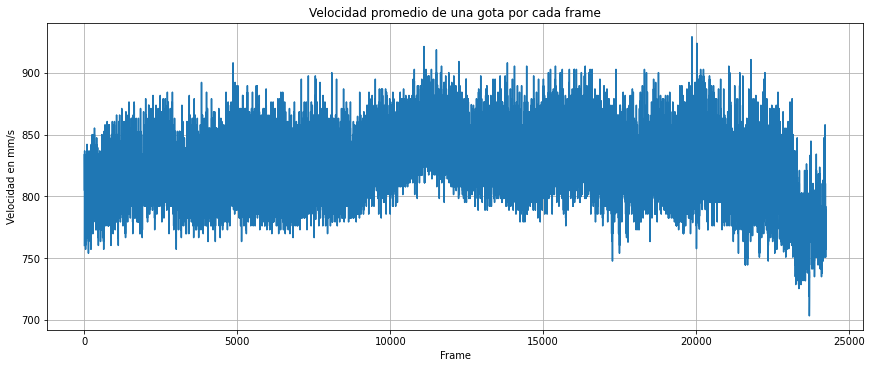

La velocidad promedio es igual a: 822.4944835781482 mm/s


In [40]:
# Convertimos a mm
fig, ax = plt.subplots(figsize=(12, 5), constrained_layout=True)

d = (s)*0.264

plt.plot(d/t)

plt.title("Velocidad promedio de una gota por cada frame")
plt.ylabel("Velocidad en mm/s")
plt.xlabel("Frame")

plt.grid()
plt.show()

print("La velocidad promedio es igual a: " + str(st.mean(d/t)) + " mm/s")